<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import MultipleLocator
import statsmodels.api as sm
from patsy import dmatrices
from scipy import stats
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook

% matplotlib inline

C:\Users\Marlowe\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
"""
Step One: Load our imports and data
"""

min_date = pd.to_datetime("01/01/1994")
max_date = pd.to_datetime("12/31/2015")

#: EventVestor data
ev_data = pd.read_csv('HFA.csv',index_col=0)

#: Converting our Dates into a Series of Datetimes so we can do some date logic easily
ev_data['date'] = pd.to_datetime(ev_data['date'])
ev_data = ev_data[(ev_data['date'] > min_date)]
ev_data = ev_data[(ev_data['date'] < max_date)]

In [3]:
ev_data['EventDate']=pd.to_datetime(ev_data['EventDate'].astype(int).astype(str),errors='coerce')

In [4]:
# permno = ev_data['Permno'][ev_data['Permno']>0].astype(int).drop_duplicates()
# permno.to_csv('HFA_permno.txt',index=False)

In [5]:
# (ev_data['EventDate'].apply(lambda x:x.weekday())>4).sum()

In [4]:
CRSP = pd.read_csv('CRSP.csv',na_values=['','C','B'])

In [5]:
for col in ['VOL','RET','SHROUT','vwretd','ewretd']:
    flag = pd.notnull(CRSP[col])
    CRSP.loc[CRSP.index[flag],col] = \
    stats.mstats.winsorize(CRSP[flag][col],limits=(0.01,0.01))

In [6]:
CRSP['date'] = pd.to_datetime(CRSP['date'].astype(str))

In [7]:
CRSP['RET+1'] = CRSP['RET'] + 1
CRSP['vwretd+1'] = CRSP['vwretd'] + 1
CRSP['ewretd+1'] = CRSP['ewretd'] + 1
CRSP['tor'] = CRSP['VOL'] / CRSP['SHROUT'] / 1000

In [32]:
# car = pd.DataFrame(np.zeros([4276,41]),columns=list(range(-20,21)),index=list(range(4276)))

In [33]:
# car['year'] = ev_data.year.values

In [34]:
# car.head()

,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,...,12,13,14,15,16,17,18,19,20,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008.0


In [35]:
# for i in tqdm_notebook(range(4276)):
#     ev_date = ev_data.iloc[i,6]
#     if ev_date.weekday() == 5:
#         ev_date = ev_date + pd.Timedelta(days=2)
#     if ev_date.weekday() == 6:
#         ev_date = ev_date + pd.Timedelta(days=1)
#     per = ev_data.iloc[i,3]
#     df = CRSP[CRSP['PERMNO']==per].sort_values(by='date')
#     index = df['date'][df.date==ev_date].index
#     if len(index) > 0:
#         index = index[0]
#         window = df.loc[index-20:index+20,:]
#         if len(window) == 41:
#             window['cret'] = window['RET+1'].cumprod()
#             window['cvwretd'] = window['vwretd+1'].cumprod()
#             car.loc[i,:-1] = list(window['cret'] - window['cvwretd'])

HBox(children=(IntProgress(value=0, max=4276), HTML(value='')))

In [36]:
# car.to_csv('car.csv',encoding='utf-8',index=False)

In [8]:
car = pd.read_csv('car.csv',encoding='utf-8')
car1 = car.iloc[:,:-1].copy()
car2 = car1[(car1 != 0).sum(axis=1).astype(bool)]
acar = car2.mean()

In [14]:
# cat = pd.DataFrame(np.zeros([42,4276]),columns=list(range(4276)),index=list(range(-20,22)))

In [15]:
# for i in range(4276):
#     ev_date = ev_data.iloc[i,6]
#     if ev_date.weekday() == 5:
#         ev_date = ev_date + pd.Timedelta(days=2)
#     if ev_date.weekday() == 6:
#         ev_date = ev_date + pd.Timedelta(days=1)
#     per = ev_data.iloc[i,3]
#     df = CRSP[CRSP['PERMNO']==per].sort_values(by='date')
#     index = df['date'][df.date==ev_date].index
#     if len(index) > 0:
#         index = index[0]
#         window = df.loc[index-100:index+21,:]
#         if len(window) == 122:
#             norm = window.iloc[0:61,-1].mean()
#             cat.loc[:,i] = list((window.iloc[-42:,-1] - norm) / norm)

In [16]:
# cat = cat.transpose()
# cat.to_csv('cat.csv',encoding='utf-8',index=False)

In [9]:
cat = pd.read_csv('cat.csv',encoding='utf-8')
cat1 = cat.copy()
cat2 = cat1[(cat1 != 0).sum(axis=1).astype(bool)]
acat = cat2.mean()

In [10]:
cat[pd.notnull(cat.iloc[:,0]) & (cat.iloc[:,0] != 0)].shape

(3538, 42)

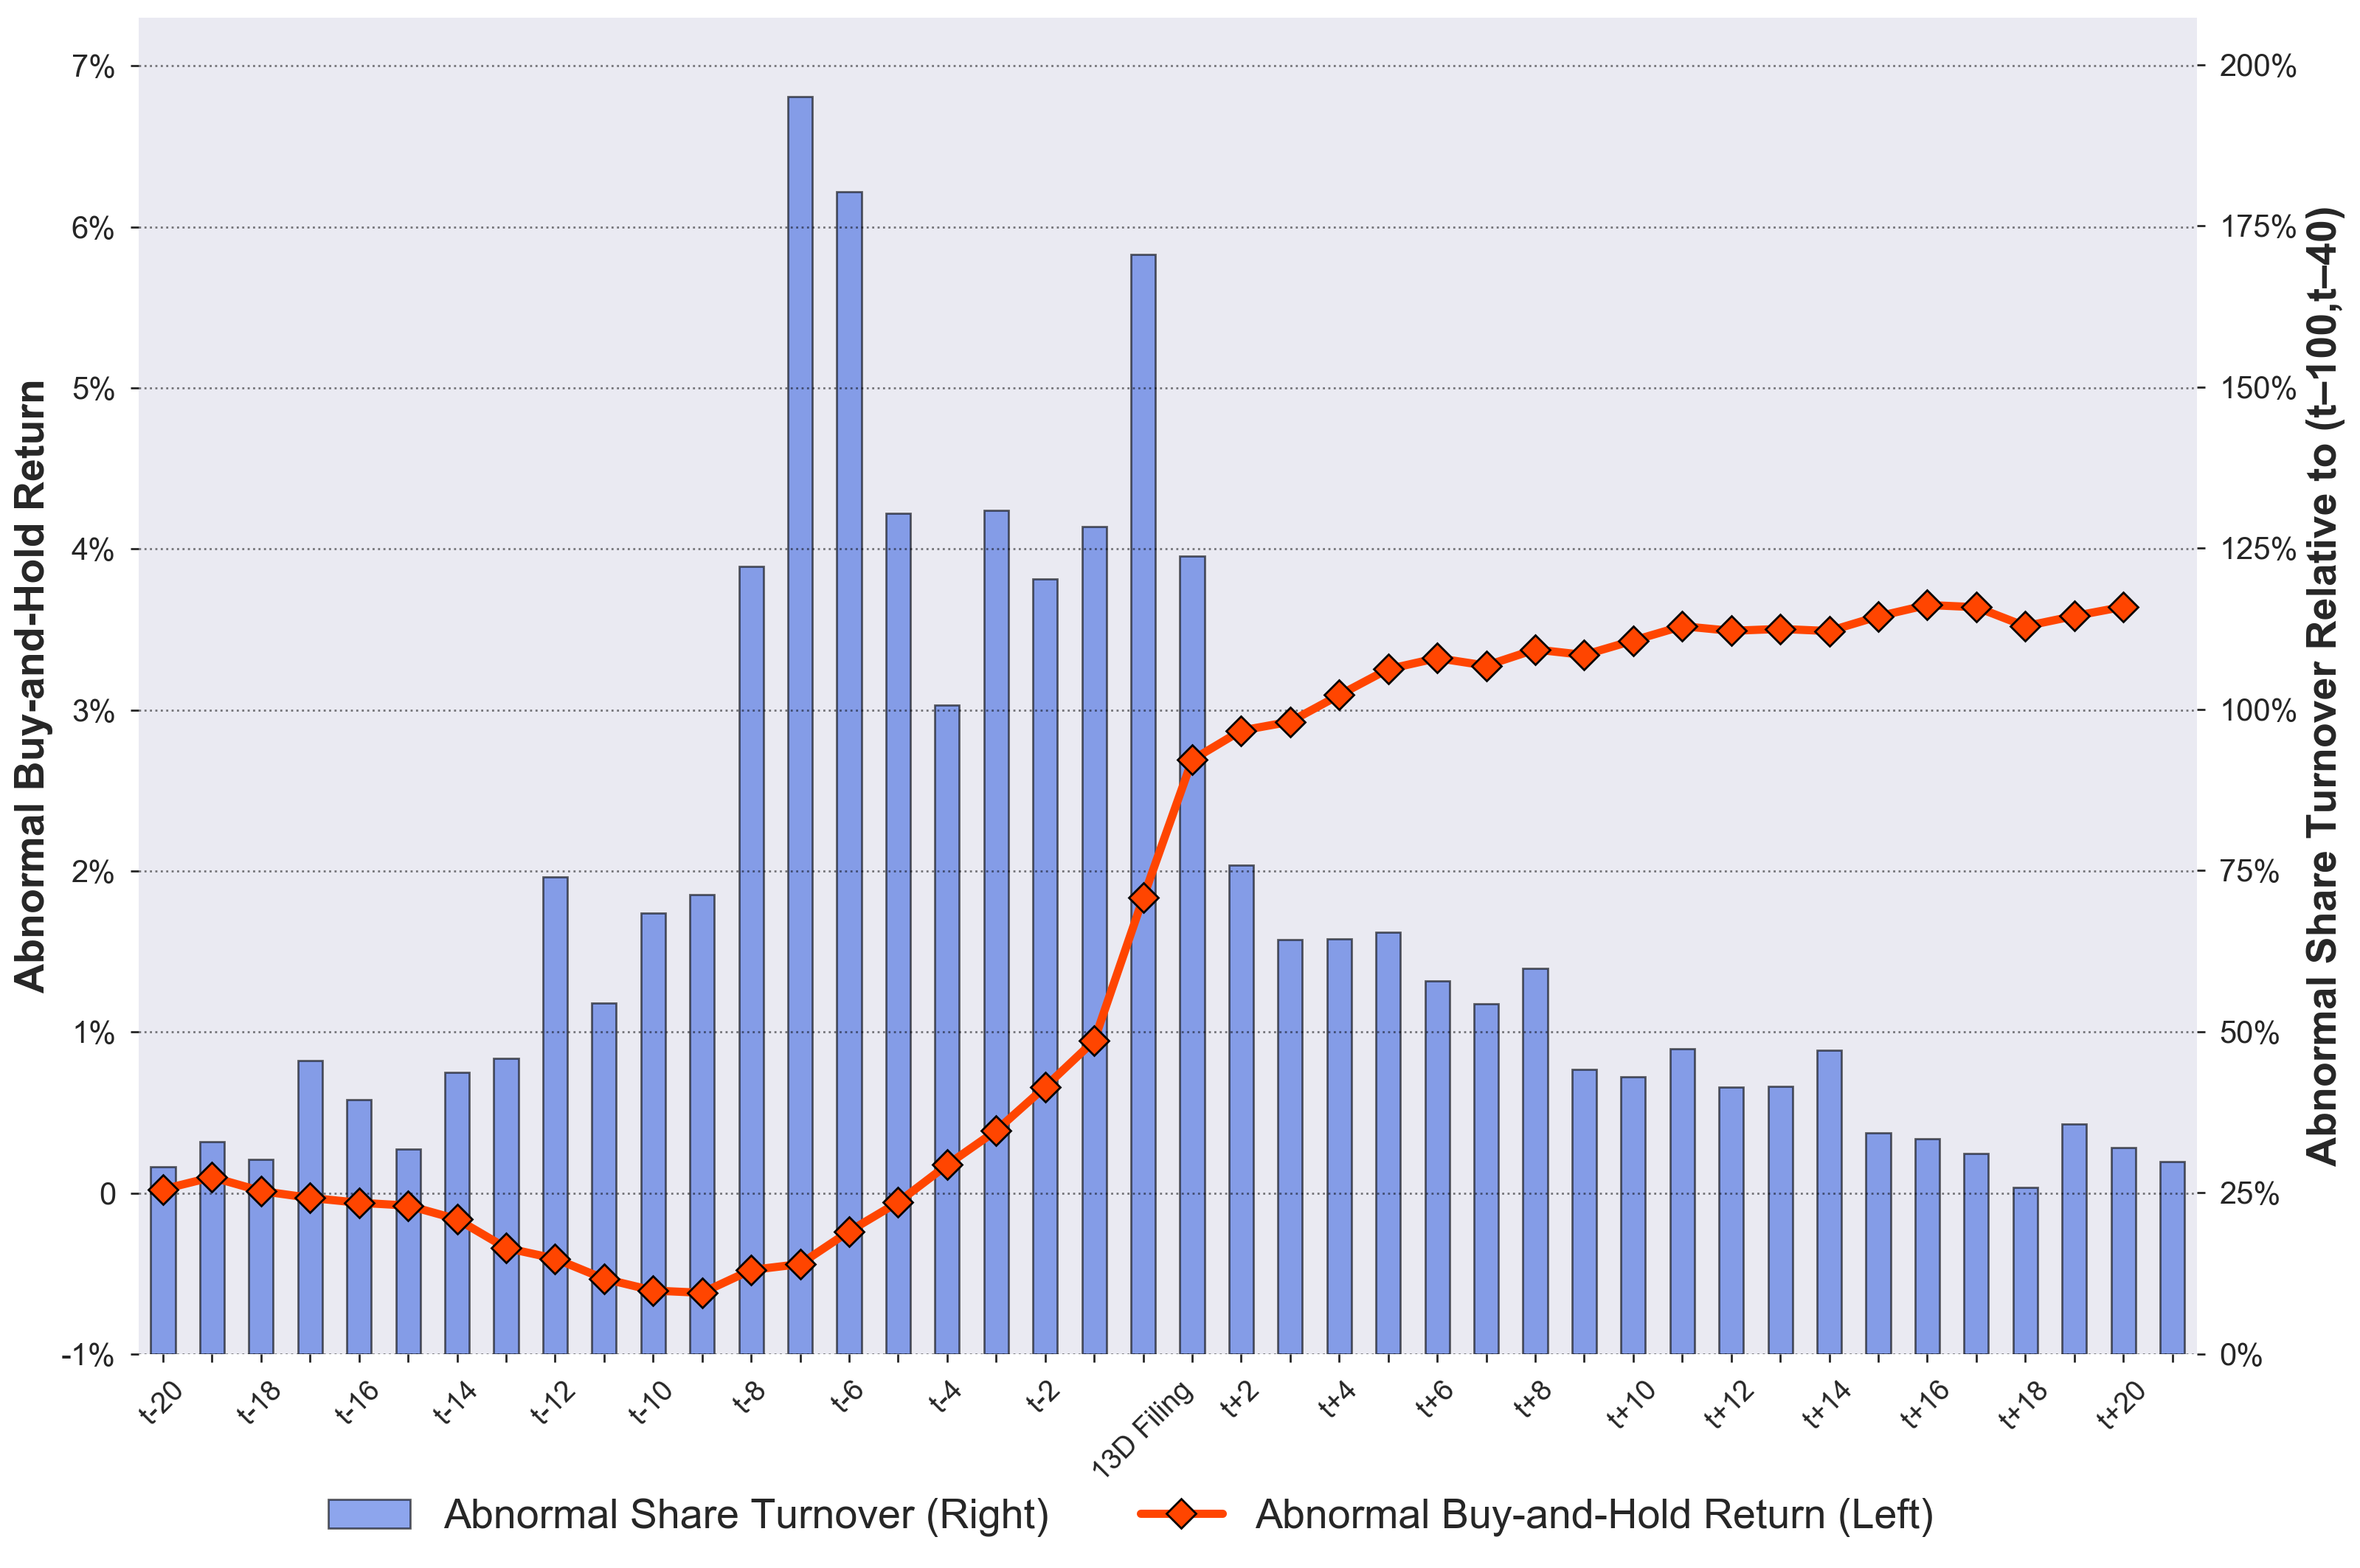

In [11]:
sns.set(style='darkgrid')
fig1 = plt.figure(figsize = (18,12),dpi=200)
ax1 = fig1.add_subplot(111)

ax1.bar(np.arange(-20,22),acat,width=0.5,label='Abnormal Share Turnover (Right)',color='royalblue',edgecolor='black',\
       linewidth=1,alpha=0.6)
ax1.set_xticks(np.arange(-20,22))
ax1.set_xlim(-20.5,21.5)
ax1.set_xticklabels(['t-20','','t-18','','t-16','','t-14','','t-12','','t-10','','t-8','',\
                    't-6','','t-4','','t-2','','13D Filing','','t+2','','t+4','','t+6','','t+8',\
                    '','t+10','','t+12','','t+14','','t+16','','t+18','','t+20'],fontsize=14,\
                   rotation=45)
ax1.tick_params(axis='both',direction='out',length=4,which='both')
ax1.set_ylim(0,2.073)
ax1.set_yticks(np.arange(0,2.25,0.25))
ax1.set_yticklabels(['%d%%' % i for i in range(0,225,25)],fontsize=15)
ax1.set_ylabel('Abnormal Share Turnover Relative to (t–100,t–40)',size=20,weight='bold',\
              verticalalignment='bottom')
ax1.grid(False)

ax2 = ax1.twinx()
# ax.spines['bottom'].set_color('black')
# ax.spines['top'].set_color('black')
# ax.spines['left'].set_color('black')
# ax.spines['right'].set_color('black')
ax2.plot(np.arange(-20,21),acar,lw = 4,color='orangered',marker = 'D',markersize=10,markerfacecolor='orangered',\
         markeredgecolor='black',markeredgewidth=1,alpha=1,\
         label='Abnormal Buy-and-Hold Return (Left)')
ax2.set_xlim(-20.5,21.5)
ax2.set_yticks([-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07])
ax2.set_yticklabels(['-1%','0','1%','2%','3%','4%','5%','6%','7%'],fontsize=15)
ax2.set_ylim(-0.01,0.073)
ax2.set_ylabel('Abnormal Buy-and-Hold Return',size=20,weight='bold',\
              verticalalignment='bottom')
ax2.grid(axis='y',ls='dotted',c='black',alpha=0.5)
ax2.tick_params(axis='y',direction='out',length=4,which='both')

ax1.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks_position('left')

ax1.legend(bbox_to_anchor=(0.46, -0.08),fontsize=20)
ax2.legend(bbox_to_anchor=(0.89, -0.08),fontsize=20)

# plt.savefig("es.png",dpi=200,bbox_inches='tight')

In [12]:
tcar = car[['20','year']]
tcar = tcar.groupby(['year'],as_index=False).mean()

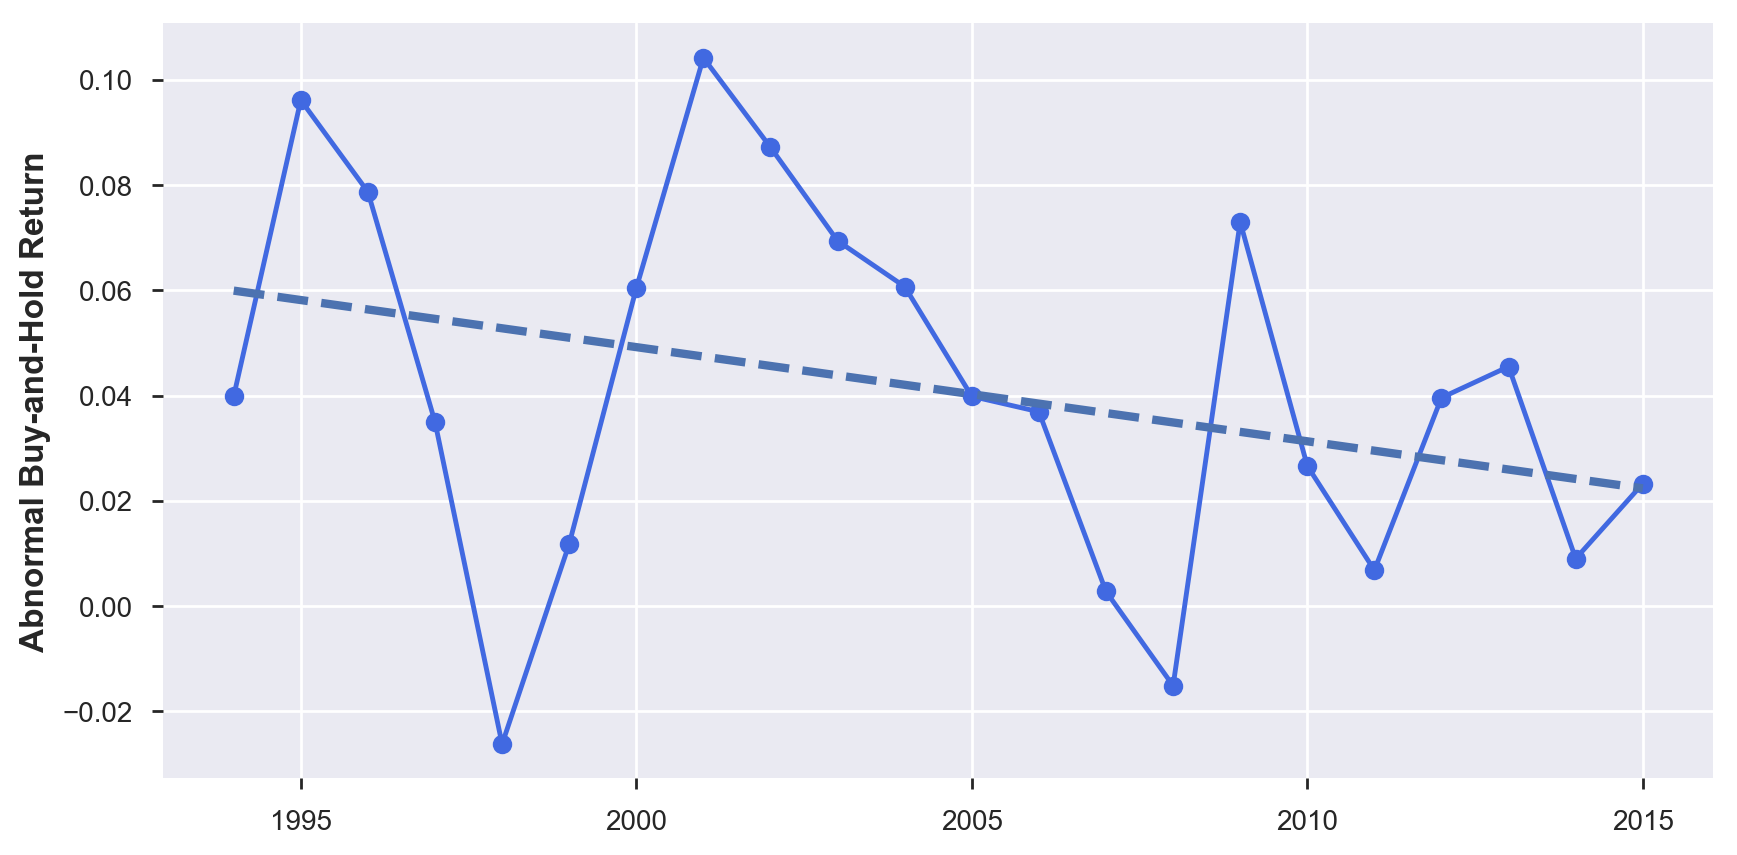

In [13]:
fig2 = plt.figure(figsize=(10,5),dpi=200)
ax1= fig2.add_subplot(111)
ax1.plot(tcar.year,tcar['20'],marker='o',color='royalblue')
ax1.tick_params(axis='both',direction='out',length=4,which='both')
ax1.set_ylabel('Abnormal Buy-and-Hold Return',size=12,weight='bold',\
              verticalalignment='bottom')
ax1.plot(tcar.year,np.poly1d(np.polyfit(tcar.year, tcar['20'], 1))(tcar.year),'--',linewidth=3)
# plt.savefig('carbyyear.png',dpi=200,bbox_inches='tight')

In [78]:
?plt.Axes.plot

In [30]:
ev_data['tar'] = list(car.iloc[:,-2])
sample = ev_data[list((car1 != 0).sum(axis=1).astype(bool))]

In [31]:
com1 = pd.read_csv('Company.csv')

In [32]:
df1 = pd.pivot_table(com1,index="gvkey",values='rnd46',aggfunc=lambda x:pd.notnull(x).sum())
df2 = df1[df1.rnd46>0].index

In [33]:
df3 = com1[com1['gvkey'].isin(df2) | pd.isnull(com1['gvkey'])]

In [34]:
df3.rnd46 = df3.rnd46.fillna(value=0)
df3['analyst'] = df3['analyst'].fillna(value = 0)
df3['herfindahl'] = df3['herfindahl'].fillna(value = 1)
df3['inst'] = df3['inst'].fillna(value = 0)
df3['divyld'] = df3['divyld'].fillna(value = 0)

In [35]:
sample1 = pd.merge(sample,df3,left_on = ['Permno','year-1'],\
                 right_on = ['permno','yeara'])

In [36]:
cov = ['analyst','divyld','growth3yr','herfindahl','inst',\
 'levb','mv','q','rnd46','roa']
skewness = stats.skew(sample1[cov].dropna(),axis = 0)

In [37]:
cov_rs = [cov[i] for i in range(len(cov)) if skewness[i] > 0]
print(cov_rs)

['analyst', 'divyld', 'growth3yr', 'inst', 'levb', 'mv', 'q', 'rnd46']


In [38]:
sample1['lnmv'] = sample1['mv'].apply(np.log)
sample1[['analyst_log','rnd46_log']] = \
sample1[['analyst','rnd46']].apply(lambda x: np.log(1+x))

In [39]:
sample2 = sample1[(sample1.year<2016) & (sample1.year>1993)]
sample2.to_csv('sam.csv',encoding='utf-8',index=False)

In [40]:
y,X = dmatrices('tar ~ lnmv + q + levb + rnd46_log + roa + growth3yr\
+ divyld + inst + herfindahl + analyst_log',\
                data = sample2,return_type = 'dataframe')
model = sm.OLS(y,X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tar   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.961
Date:                Tue, 22 May 2018   Prob (F-statistic):             0.0338
Time:                        17:57:14   Log-Likelihood:                 33.359
No. Observations:                2014   AIC:                            -44.72
Df Residuals:                    2003   BIC:                             16.97
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0896      0.029      3.132      0.002       0.034       0.146
lnmv           -0.0128      0.004     -2.899      0.004      -0.022      -0.004
q              -0.0008      0.002     -0.454      0.650      -0.004       0.003
levb            0.0336      0.022      1.508      0.132      -0.010       0.077
rnd46_log       0.0009      0.004      0.261      0.794      -0.006       0.008
roa            -0.0113      0.027     -0.418      0.676      -0.064       0.042
growth3yr      -0.0226      0.010     -2.237      0.025      -0.042      -0.003
divyld          0.0695      0.098      0.711      0.477      -0.122       0.261
inst           -0.0161      0.026     -0.623      0.534      -0.067       0.035
herfindahl      0.0036      0.021      0.176      0.860      -0.037       0.044
analyst_log     0.0181      0.008      2.133      0.033       0.001       0.035
==============================================================================
Omnibus:                     1688.797   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109667.050
Skew:                           3.517   Prob(JB):                         0.00
Kurtosis:                      38.459   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
sample2.tar

0      -0.185351
1      -0.113563
2            NaN
3       0.180501
4      -0.338200
5       0.341626
6      -0.030414
7      -0.094291
8      -0.106598
9       0.084384
10      0.376880
11     -0.070581
12      0.068962
13      0.026514
14     -0.129821
15     -0.131945
16      0.022322
17     -0.039431
18     -0.001746
19      0.025955
20     -0.126261
21      0.037710
22     -0.165012
23     -0.007083
24      0.062902
25     -0.043120
26      0.008319
27     -0.210934
28      0.285438
29      0.135248
          ...   
2035    0.104983
2036   -0.091962
2037    0.056707
2038   -0.107116
2039   -0.126465
2040   -0.027397
2041    0.121920
2042   -0.320461
2043   -0.139870
2044   -0.065264
2045   -0.022472
2046   -0.190456
2047   -0.076780
2048    0.095913
2049   -0.098406
2050    0.278528
2051    0.101753
2052   -0.088568
2053   -0.063523
2054    0.017257
2055   -0.036604
2056    0.068305
2057    0.220382
2058    0.203894
2059    0.001758
2060    0.432545
2061    0.238127
2062    0.0531

In [23]:
sample1.columns

Index(['FundName', 'TargetName', 'FundID', 'Permno', 'NCUSIP', 'Gvkey',
       'EventDate', 'Date13D', 'DateCross5pct', 'date', 'year', 'year-1',
       'tar', 'Unnamed: 0', 'amex', 'altman', 'amihudi2', 'analyst', 'assets6',
       'b2m', 'b2mquant', 'crspage', 'cash1', 'equity216', 'growth3yr',
       'hhisic3', 'herfindahl', 'inst', 'levb', 'mv', 'mvquant', 'mktshrsic3',
       'nyse', 'nasdaq', 'pe', 'permno', 'payoutyld', 'q', 'rnd46', 'roa',
       'sp500member', 'sales12', 'shrpurchase115', 'stkretindadj', 'tdc1',
       'to', 'cusip', 'cusip6', 'divincrease', 'divyld', 'dnum', 'fyr',
       'gvkey', 'newceo', 'yeara', 'qquant'],
      dtype='object')

In [48]:
CRSP.head(3)

,PERMNO,date,NCUSIP,VOL,RET,SHROUT,vwretd,ewretd,RET+1,vwretd+1,ewretd+1,tor
0,10001,1993-09-01,39040610,788.0,0.055118,1339.0,0.000428,0.003611,1.055118,1.000428,1.003611,0.000588
1,10001,1993-09-02,39040610,100.0,0.000000,1339.0,-0.001750,0.002683,1.000000,0.998250,1.002683,0.000075
2,10001,1993-09-03,39040610,900.0,0.000000,1339.0,0.000642,0.004525,1.000000,1.000642,1.004525,0.000672


In [60]:
ev_data

,FundName,TargetName,FundID,Permno,NCUSIP,Gvkey,EventDate,Date13D,DateCross5pct,date,year,year-1
0,ACCIPITER CAPITAL MANAGEMENT LLC,ARENA PHARMACEUTICALS,1,88421.0,004004710,138122,2005-01-31,20050131.0,0.0,2005-01-31,2005.0,2004.0
1,ACCIPITER CAPITAL MANAGEMENT LLC,LIFEPOINT HOSPITALS INC.,1,86899.0,053219L10,120297,2006-03-24,0.0,0.0,2006-03-24,2006.0,2005.0
2,ACCIPITER CAPITAL MANAGEMENT LLC,AMERICAN HOMEPATIENT INC,1,77098.0,002664910,24668,2006-06-16,20060616.0,20060615.0,2006-06-16,2006.0,2005.0
3,ACCIPITER CAPITAL MANAGEMENT LLC,RURAL/METRO CORPORATION,1,79417.0,078174810,28616,2006-09-05,20060905.0,20060824.0,2006-09-05,2006.0,2005.0
4,ACCIPITER CAPITAL MANAGEMENT LLC,"VISTACARE, INC.",1,89622.0,092839Y10,150284,2008-02-07,20080207.0,20080206.0,2008-02-07,2008.0,2007.0
5,ACCIPITER CAPITAL MANAGEMENT LLC,PENWEST PHARMACEUTICALS CO,1,86333.0,070975410,113533,2008-02-19,20080219.0,20080215.0,2008-02-19,2008.0,2007.0
6,ACCIPITER CAPITAL MANAGEMENT LLC,ORCHID CELLMARK INC,1,88255.0,068573C10,135004,2010-03-10,20100310.0,20100308.0,2010-03-10,2010.0,2009.0
7,ACCIPITER CAPITAL MANAGEMENT LLC,TRIPLE S MANAGEMENT CORP,1,92506.0,896749108,174647,2013-05-28,20130528.0,20130517.0,2013-05-28,2013.0,2012.0
8,ACQUISITOR HOLDINGS LTD,AIR METHODS CORP,2,11641.0,000912830,13789,2002-10-09,20021009.0,20021007.0,2002-10-09,2002.0,2001.0
9,ACQUISITOR HOLDINGS LTD,ALDILA INC,2,79247.0,001438420,28388,2002-10-09,20021009.0,20021007.0,2002-10-09,2002.0,2001.0


In [58]:
ev_data

,FundName,TargetName,FundID,Permno,NCUSIP,Gvkey,EventDate,Date13D,DateCross5pct,date,year,year-1
0,ACCIPITER CAPITAL MANAGEMENT LLC,ARENA PHARMACEUTICALS,1,88421.0,004004710,138122,2005-01-31,20050131.0,0.0,2005-01-31,2005.0,2004.0
1,ACCIPITER CAPITAL MANAGEMENT LLC,LIFEPOINT HOSPITALS INC.,1,86899.0,053219L10,120297,2006-03-24,0.0,0.0,2006-03-24,2006.0,2005.0
2,ACCIPITER CAPITAL MANAGEMENT LLC,AMERICAN HOMEPATIENT INC,1,77098.0,002664910,24668,2006-06-16,20060616.0,20060615.0,2006-06-16,2006.0,2005.0
3,ACCIPITER CAPITAL MANAGEMENT LLC,RURAL/METRO CORPORATION,1,79417.0,078174810,28616,2006-09-05,20060905.0,20060824.0,2006-09-05,2006.0,2005.0
4,ACCIPITER CAPITAL MANAGEMENT LLC,"VISTACARE, INC.",1,89622.0,092839Y10,150284,2008-02-07,20080207.0,20080206.0,2008-02-07,2008.0,2007.0
5,ACCIPITER CAPITAL MANAGEMENT LLC,PENWEST PHARMACEUTICALS CO,1,86333.0,070975410,113533,2008-02-19,20080219.0,20080215.0,2008-02-19,2008.0,2007.0
6,ACCIPITER CAPITAL MANAGEMENT LLC,ORCHID CELLMARK INC,1,88255.0,068573C10,135004,2010-03-10,20100310.0,20100308.0,2010-03-10,2010.0,2009.0
7,ACCIPITER CAPITAL MANAGEMENT LLC,TRIPLE S MANAGEMENT CORP,1,92506.0,896749108,174647,2013-05-28,20130528.0,20130517.0,2013-05-28,2013.0,2012.0
8,ACQUISITOR HOLDINGS LTD,AIR METHODS CORP,2,11641.0,000912830,13789,2002-10-09,20021009.0,20021007.0,2002-10-09,2002.0,2001.0
9,ACQUISITOR HOLDINGS LTD,ALDILA INC,2,79247.0,001438420,28388,2002-10-09,20021009.0,20021007.0,2002-10-09,2002.0,2001.0
